In [39]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
import pickle

In [10]:
#loading data
x = np.load("C:/Users/zhich/Documents/GitHub/cs4220-T4_proj2/data/train.dataset.6mer.npy")
x = pd.DataFrame(x)
y = pd.read_csv("C:/Users/zhich/Documents/GitHub/cs4220-T4_proj2/data/train_labels.csv")

In [11]:
#encode labels
le = preprocessing.LabelEncoder()
le.fit(y['genome_name'].unique())
y_index = le.transform(y['genome_name'].values)

In [12]:
x.shape

(505536, 2080)

In [13]:
y.shape

(505536, 1)

In [14]:
x['genome_label'] = y_index

In [28]:
#subsetting training set
sample_size = x.genome_label.value_counts().to_frame().min().values[0]//10
train_set = x.groupby('genome_label').apply(lambda x: x.sample(sample_size))

In [29]:
train_set

0         1         2         3         4  \
genome_label                                                           
0            49517  0.003956  0.003710  0.003462  0.001484  0.002474   
             48957  0.003141  0.002356  0.002356  0.002226  0.001308   
             49779  0.003382  0.001932  0.001932  0.002415  0.001450   
             49085  0.000000  0.000743  0.000743  0.000743  0.002230   
             49399  0.002586  0.000924  0.002031  0.001662  0.001293   
...                      ...       ...       ...       ...       ...   
30           74141  0.000788  0.001915  0.000225  0.000901  0.001915   
             75176  0.003557  0.000889  0.000889  0.001779  0.001334   
             74341  0.000667  0.000000  0.001333  0.002001  0.002001   
             73789  0.001104  0.001104  0.000552  0.002209  0.001657   
             74019  0.004143  0.002071  0.002071  0.001036  0.001036   

                           5         6         7         8         9  ...  \
genome_label                                                          ...   
0            49517  0.002968  0.001978  0.001237  0.002720  0.001978  ...   
             48957  0.002094  0.001701  0.001701  0.002094  0.001178  ...   
             49779  0.000483  0.000483  0.001932  0.001932  0.000000  ...   
             49085  0.000000  0.002972  0.001486  0.000000  0.001486  ...   
             49399  0.002031  0.001847  0.000554  0.001847  0.001293  ...   
...                      ...       ...       ...       ...       ...  ...   
30           74141  0.001126  0.001689  0.001464  0.000338  0.000451  ...   
             75176  0.000889  0.000000  0.001334  0.000889  0.000000  ...   
             74341  0.001333  0.000000  0.000000  0.000000  0.001333  ...   
             73789  0.001104  0.000000  0.001104  0.001104  0.003313  ...   
             74019  0.000518  0.002071  0.003626  0.000000  0.001036  ...   

                        2071      2072      2073      2074      2075  \
genome_label                                                           
0            49517  0.000000  0.000000  0.000247  0.000494  0.000000   
             48957  0.000262  0.000000  0.000524  0.000000  0.000131   
             49779  0.000966  0.000000  0.000483  0.000000  0.000000   
             49085  0.000000  0.000000  0.000000  0.000000  0.000000   
             49399  0.000000  0.000000  0.000000  0.000000  0.000000   
...                      ...       ...       ...       ...       ...   
30           74141  0.000451  0.000338  0.000788  0.000000  0.000451   
             75176  0.000000  0.000000  0.000445  0.000000  0.000000   
             74341  0.000000  0.000667  0.000667  0.000000  0.000000   
             73789  0.002209  0.000000  0.000000  0.000000  0.000000   
             74019  0.000000  0.000000  0.001036  0.000000  0.000000   

                        2076      2077      2078  2079  genome_label  
genome_label                                                          
0            49517  0.000000  0.000000  0.000000   0.0             0  
             48957  0.000000  0.000000  0.000000   0.0             0  
             49779  0.000000  0.000000  0.000966   0.0             0  
             49085  0.000000  0.000000  0.000000   0.0             0  
             49399  0.000000  0.000000  0.000000   0.0             0  
...                      ...       ...       ...   ...           ...  
30           74141  0.000225  0.000113  0.000225   0.0            30  
             75176  0.000889  0.000000  0.000889   0.0            30  
             74341  0.000000  0.000667  0.000000   0.0            30  
             73789  0.000000  0.000000  0.000000   0.0            30  
             74019  0.000000  0.000518  0.001036   0.0            30  

[2821 rows x 2081 columns]

In [30]:
#train-test split
x_train, x_test, y_train, y_test = train_test_split(train_set.iloc[:,:-1], train_set["genome_label"], random_state=0)

In [31]:
#random forest model parameters
clf = RandomForestClassifier(n_estimators=1000,oob_score=True,random_state=0)

In [32]:
#fitting model
clf.fit(x_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=1000, oob_score=True, random_state=0)

In [33]:
#feature importances
clf.feature_importances_

array([0.00178876, 0.00218607, 0.00112908, ..., 0.00042979, 0.00074644,
       0.00031861])

In [35]:
#oob score
clf.oob_score_

0.706855791962175

In [36]:
#predictions for test set
y_pred = clf.predict(x_test)

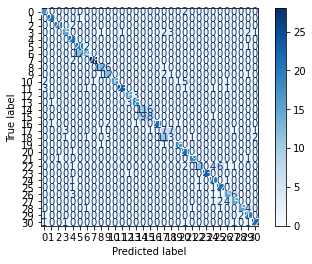

In [37]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [40]:
#precision score for predictions
precision_score(y_test, y_pred, average='weighted')

0.7574156094146786

In [41]:
#saving model
filename = "C:/Users/zhich/Documents/GitHub/cs4220-T4_proj2/models/rf_baseline.sav"
pickle.dump(clf, open(filename, 'wb'))